In [1]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline 
# I will combine all transformation into a pipeline, so that test dataset can work.

# Open dataset files
cleveland = pd.read_csv("cleveland.data")
switzerland = pd.read_csv("switzerland.data")
hungary = pd.read_csv("hungary.data")
va = pd.read_csv("va.data")

cleveland.columns=["Age", "Sex", "CP", "Trestbps", "Chol", "Fbs", "Restecg", "Thalach", "Exang", "Oldpeak", "Slope", "CA", "Thal", "Label"]
switzerland.columns=["Age", "Sex", "CP", "Trestbps", "Chol", "Fbs", "Restecg", "Thalach", "Exang", "Oldpeak", "Slope", "CA", "Thal", "Label"]
hungary.columns=["Age", "Sex", "CP", "Trestbps", "Chol", "Fbs", "Restecg", "Thalach", "Exang", "Oldpeak", "Slope", "CA", "Thal", "Label"]
va.columns=["Age", "Sex", "CP", "Trestbps", "Chol", "Fbs", "Restecg", "Thalach", "Exang", "Oldpeak", "Slope", "CA", "Thal", "Label"]

# The null values describes as question marks at data set, we need to convert them to np.NaN to be able to analyse nulls.

cleveland.replace("?", np.NaN, inplace=True)
switzerland.replace("?", np.NaN, inplace=True)
hungary.replace("?", np.NaN, inplace=True)
va.replace("?", np.NaN, inplace=True)

In [2]:
np.random.seed(0)

In [3]:
# Unite all data loaded above.
data = pd.DataFrame(cleveland.append(switzerland.append(hungary.append(va))))

# Split Training set and Test Set.
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)
# I Also tried Stratified Sampling but some problems occured, instance numbers doubled that I could not fix.
# This separiton is quite enough.

In [4]:
train_set.info()
# Take look at training set. There object dtypes, so that we cannot see description properly.
# Labels are also included.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 732 entries, 25 to 102
Data columns (total 14 columns):
Age         732 non-null float64
Sex         732 non-null float64
CP          732 non-null float64
Trestbps    687 non-null object
Chol        710 non-null object
Fbs         662 non-null object
Restecg     730 non-null object
Thalach     689 non-null object
Exang       689 non-null object
Oldpeak     683 non-null object
Slope       492 non-null object
CA          249 non-null object
Thal        341 non-null object
Label       732 non-null int64
dtypes: float64(3), int64(1), object(10)
memory usage: 85.8+ KB


In [5]:
train_set.head()

,Age,Sex,CP,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,CA,Thal,Label
25,58.0,0.0,3.0,120,340,0,0,172,0,0,1,0.0,3.0,0
84,44.0,1.0,3.0,140,235,0,2,180,0,0,1,0.0,3.0,0
10,56.0,0.0,2.0,140,294,0,2,153,0,1.3,2,0.0,3.0,0
80,61.0,1.0,4.0,146,241,0,0,148,1,3,3,NaN,NaN,2
27,38.0,1.0,2.0,140,297,0,0,150,0,0,NaN,NaN,NaN,0


In [6]:
# Both training and test set labels separated from training features.
train_y = train_set["Label"]
train_x = train_set.drop("Label", axis=1)
test_y = test_set["Label"]
test_x = test_set.drop("Label", axis = 1)

In [7]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 732 entries, 25 to 102
Data columns (total 13 columns):
Age         732 non-null float64
Sex         732 non-null float64
CP          732 non-null float64
Trestbps    687 non-null object
Chol        710 non-null object
Fbs         662 non-null object
Restecg     730 non-null object
Thalach     689 non-null object
Exang       689 non-null object
Oldpeak     683 non-null object
Slope       492 non-null object
CA          249 non-null object
Thal        341 non-null object
dtypes: float64(3), object(10)
memory usage: 80.1+ KB


In [8]:
# All data set is numeric but we cannot see the description.
train_x.describe()

,Age,Sex,CP
count,732.000000,732.000000,732.000000
mean,53.519126,0.784153,3.243169
std,9.516113,0.411690,0.928877
min,29.000000,0.000000,1.000000
25%,47.000000,1.000000,3.000000
50%,54.000000,1.000000,4.000000
75%,60.000000,1.000000,4.000000
max,77.000000,1.000000,4.000000


In [9]:
train_x.head()

,Age,Sex,CP,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,CA,Thal
25,58.0,0.0,3.0,120,340,0,0,172,0,0,1,0.0,3.0
84,44.0,1.0,3.0,140,235,0,2,180,0,0,1,0.0,3.0
10,56.0,0.0,2.0,140,294,0,2,153,0,1.3,2,0.0,3.0
80,61.0,1.0,4.0,146,241,0,0,148,1,3,3,NaN,NaN
27,38.0,1.0,2.0,140,297,0,0,150,0,0,NaN,NaN,NaN


In [10]:
from sklearn.base import TransformerMixin, BaseEstimator
# This is a custom transformer. Makes all dtypes to float.
class NumericTransformer(TransformerMixin, BaseEstimator):
    def fit(self, data):
        return self
    def transform(self, data):
        return data.apply(pd.to_numeric)

        
nt = NumericTransformer()
nt.fit(train_x)
train_x_num = nt.transform(train_x)

In [11]:
train_x_num.info()
# Here there is a problem, the Thal, CA, Slope have lots of NaN's, it may be a problem. 
# Maybe they will not be used for model!!.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 732 entries, 25 to 102
Data columns (total 13 columns):
Age         732 non-null float64
Sex         732 non-null float64
CP          732 non-null float64
Trestbps    687 non-null float64
Chol        710 non-null float64
Fbs         662 non-null float64
Restecg     730 non-null float64
Thalach     689 non-null float64
Exang       689 non-null float64
Oldpeak     683 non-null float64
Slope       492 non-null float64
CA          249 non-null float64
Thal        341 non-null float64
dtypes: float64(13)
memory usage: 80.1 KB


In [12]:
train_x_num.head()

,Age,Sex,CP,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,CA,Thal
25,58.0,0.0,3.0,120.0,340.0,0.0,0.0,172.0,0.0,0.0,1.0,0.0,3.0
84,44.0,1.0,3.0,140.0,235.0,0.0,2.0,180.0,0.0,0.0,1.0,0.0,3.0
10,56.0,0.0,2.0,140.0,294.0,0.0,2.0,153.0,0.0,1.3,2.0,0.0,3.0
80,61.0,1.0,4.0,146.0,241.0,0.0,0.0,148.0,1.0,3.0,3.0,NaN,NaN
27,38.0,1.0,2.0,140.0,297.0,0.0,0.0,150.0,0.0,0.0,NaN,NaN,NaN


In [13]:
train_x_num.describe() 
# Now we can see further horizon!

,Age,Sex,CP,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,CA,Thal
count,732.000000,732.000000,732.000000,687.000000,710.000000,662.000000,730.000000,689.000000,689.000000,683.000000,492.000000,249.000000,341.000000
mean,53.519126,0.784153,3.243169,132.292576,200.007042,0.151057,0.609589,137.898403,0.397678,0.887408,1.768293,0.642570,5.046921
std,9.516113,0.411690,0.928877,19.748646,109.579327,0.358376,0.809522,25.781024,0.489774,1.080480,0.627907,0.931502,1.916837
min,29.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-1.500000,1.000000,0.000000,3.000000
25%,47.000000,1.000000,3.000000,120.000000,177.000000,0.000000,0.000000,120.000000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,54.000000,1.000000,4.000000,130.000000,223.000000,0.000000,0.000000,140.000000,0.000000,0.500000,2.000000,0.000000,6.000000
75%,60.000000,1.000000,4.000000,142.000000,269.000000,0.000000,1.000000,158.000000,1.000000,1.500000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


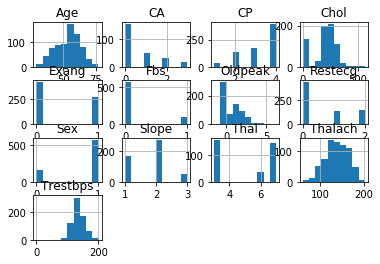

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
train_x_num.hist()
plt.show()

# The Ca, Cp, Restecg, Slope, Thal are categorical as can be seen here.
# Sex, Fbs, Exangs are boolean values. So I do not touch them.
# Sex, FBS are very imbalanced, we will try to drop them.
# We need to handle categoricals.
# Thanks to the plots, we can see general perspective.

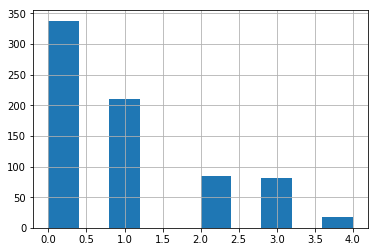

In [15]:
train_y.hist()
plt.show()
# Labels are also categories, so we need to use multiclass classifiers.
# OR translate the class int 0 (if 0) and 1 (else).
# 0 Means Negative class, 1, 2, 3 and 4 are positive classes.

In [16]:
from sklearn.preprocessing import Imputer, OneHotEncoder
# I will fill the NaN values with median value, the categoricals will not affected by the way.
fill_na = Imputer(strategy="median")
# I need the imputer for test set also, so fit them with training data.
fill_na.fit(train_x_num)
train_x_na = fill_na.transform(train_x_num)

In [17]:
train_x_na = pd.DataFrame(train_x_na, columns=train_x.columns)
train_x_na.info()
# Now there is no NULLs.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 13 columns):
Age         732 non-null float64
Sex         732 non-null float64
CP          732 non-null float64
Trestbps    732 non-null float64
Chol        732 non-null float64
Fbs         732 non-null float64
Restecg     732 non-null float64
Thalach     732 non-null float64
Exang       732 non-null float64
Oldpeak     732 non-null float64
Slope       732 non-null float64
CA          732 non-null float64
Thal        732 non-null float64
dtypes: float64(13)
memory usage: 74.4 KB


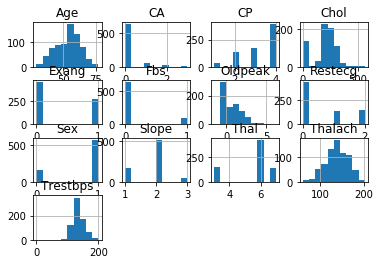

In [18]:
train_x_na.hist()
plt.show()
# General picture not change very much. That is a realistic data set now!
# Except the Thal, CA and Slope columns, they changed a lot actually.

In [19]:
train_x_na.head()

,Age,Sex,CP,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,CA,Thal
0,58.0,0.0,3.0,120.0,340.0,0.0,0.0,172.0,0.0,0.0,1.0,0.0,3.0
1,44.0,1.0,3.0,140.0,235.0,0.0,2.0,180.0,0.0,0.0,1.0,0.0,3.0
2,56.0,0.0,2.0,140.0,294.0,0.0,2.0,153.0,0.0,1.3,2.0,0.0,3.0
3,61.0,1.0,4.0,146.0,241.0,0.0,0.0,148.0,1.0,3.0,3.0,0.0,6.0
4,38.0,1.0,2.0,140.0,297.0,0.0,0.0,150.0,0.0,0.0,2.0,0.0,6.0


In [20]:
train_x_na.describe()
# Take a look...

,Age,Sex,CP,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,CA,Thal
count,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000
mean,53.519126,0.784153,3.243169,132.151639,200.698087,0.136612,0.607923,138.021858,0.374317,0.861475,1.844262,0.218579,5.556011
std,9.516113,0.411690,0.928877,19.139068,107.989273,0.343672,0.809041,25.016155,0.484277,1.048126,0.525994,0.622237,1.391150
min,29.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-1.500000,1.000000,0.000000,3.000000
25%,47.000000,1.000000,3.000000,120.000000,179.000000,0.000000,0.000000,120.000000,0.000000,0.000000,2.000000,0.000000,6.000000
50%,54.000000,1.000000,4.000000,130.000000,223.000000,0.000000,0.000000,140.000000,0.000000,0.500000,2.000000,0.000000,6.000000
75%,60.000000,1.000000,4.000000,140.000000,267.250000,0.000000,1.000000,156.000000,1.000000,1.500000,2.000000,0.000000,6.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


In [21]:
def feature_indices(X, features):
    feature_names = X.columns
    feature_index = list()
    for feature in features:
        feature_index.append(feature_names.get_loc(feature))
    feature_index.sort()
    return feature_index

In [22]:
# The Ca, Cp, Restecg, Slope are categorical. Now let's handle them with OneHotEncoder
cat = OneHotEncoder(categorical_features = feature_indices(train_x_na,["CA", "CP", "Restecg", "Thal"]), sparse=False)
train_x_onehot = cat.fit_transform(train_x_na)
train_x_onehot.shape
# The training set has 732 instances as previous data set, and has some extra features, that is expected.

(732, 23)

In [23]:
train_x_onehot

array([[ 0. ,  0. ,  1. , ...,  0. ,  0. ,  1. ],
       [ 0. ,  0. ,  1. , ...,  0. ,  0. ,  1. ],
       [ 0. ,  1. ,  0. , ...,  0. ,  1.3,  2. ],
       ..., 
       [ 0. ,  0. ,  1. , ...,  0. ,  0.5,  2. ],
       [ 1. ,  0. ,  0. , ...,  0. ,  0. ,  2. ],
       [ 0. ,  0. ,  1. , ...,  0. ,  0. ,  1. ]])

In [24]:
# Now we can analyze the possible models.

In [25]:
train_x_onehot_df = pd.DataFrame(train_x_onehot)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FABE6EAFD0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001FABE4FB518>]], dtype=object)

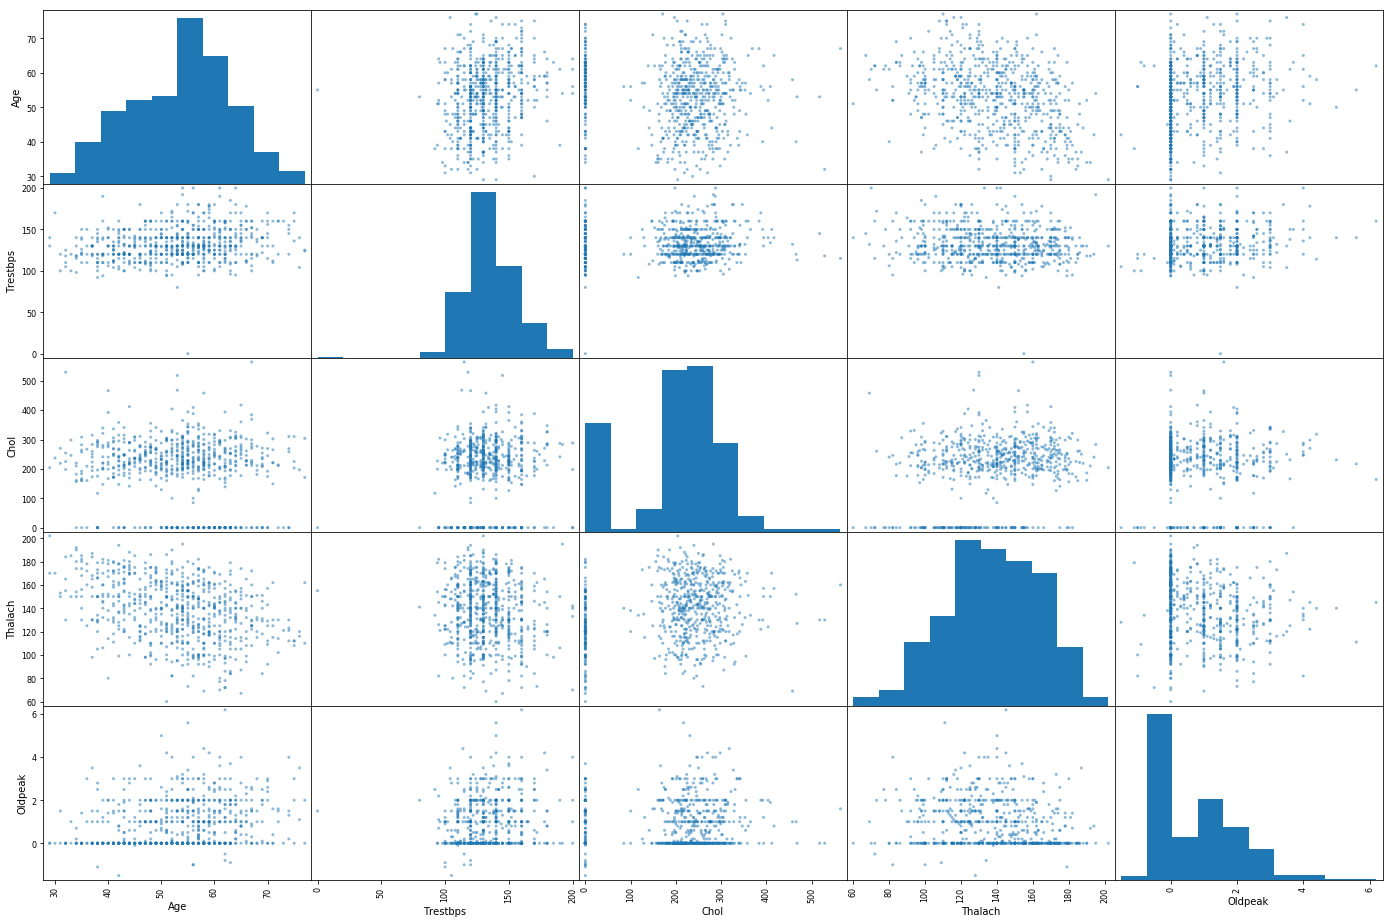

In [26]:
from pandas.plotting import scatter_matrix
scatter_matrix(train_x_num.drop(["CA", "CP", "Restecg", "Thal", "Sex", "Fbs", "Exang","Slope"], axis = 1), figsize=(24,16))
# Except the categories, the correlation is fine.

In [27]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit(train_x_onehot)
train_x_scaled = scale.transform(train_x_onehot) #Scaled data set returned

In [28]:
train_x_scaled

array([[-0.23399796, -0.47337117,  1.80438742, ..., -0.77346834,
        -0.82248154, -1.60617577],
       [-0.23399796, -0.47337117,  1.80438742, ..., -0.77346834,
        -0.82248154, -1.60617577],
       [-0.23399796,  2.11250718, -0.55420471, ..., -0.77346834,
         0.41867519,  0.29628485],
       ..., 
       [-0.23399796, -0.47337117,  1.80438742, ..., -0.77346834,
        -0.34511357,  0.29628485],
       [ 4.27354161, -0.47337117, -0.55420471, ..., -0.77346834,
        -0.82248154,  0.29628485],
       [-0.23399796, -0.47337117,  1.80438742, ..., -0.77346834,
        -0.82248154, -1.60617577]])

In [29]:
def prepare_pipeline(X, categorical_features):
    cats = feature_indices(X, categorical_features)
    p = Pipeline([
        ("make_numeric", NumericTransformer()),
        ("fill_na", Imputer(strategy="median")),
        ("cat", OneHotEncoder(categorical_features = cats, sparse=False)),
        ("scale", StandardScaler())
    ])
    
    return p.fit(X)

In [30]:
train_x_cp = train_x.copy()
prep_pipeline = prepare_pipeline(train_x_cp, ["CA", "CP", "Restecg", "Thal", "Slope"])
X_t = prep_pipeline.transform(train_x)
# Now we have a full pipeline for data preprocessing.

In [31]:
X_t.shape
# The final dataset, scaled, NA cleared, Categorized.

(732, 25)

In [32]:
y_t = train_y

In [33]:
y_t.head()

25    0
84    0
10    0
80    2
27    0
Name: Label, dtype: int64

In [34]:
from sklearn.model_selection import cross_val_score as tuning


In [35]:
def compute_score(X, y, algorithm):
    a = algorithm()
    scores = tuning(a, X, y, scoring = "accuracy", cv = 5)
    return scores.mean()

def compare_classifiers(X, y):
    np.random.seed(0)
    scores = dict()
    from sklearn.neighbors import KNeighborsClassifier as KN
    scores["KNeighbors"] = compute_score(X, y, KN)

    from sklearn.svm import LinearSVC as LSVM
    scores["LinearSVC"] = compute_score(X, y, LSVM)

    from sklearn.linear_model import LogisticRegression as LR
    scores["LogisticRegression"] = compute_score(X, y, LR)

    from sklearn.tree import DecisionTreeClassifier as DT
    scores["DecisionTree"] = compute_score(X, y, DT)

    from sklearn.ensemble import RandomForestClassifier as RF
    scores["RandomForest"] = compute_score(X, y, RF)
    
    from sklearn.svm import SVC
    scores["SVC"] = compute_score(X, y, SVC)

    from sklearn.svm import LinearSVC as LSVC
    scores["LinearSVC"] = compute_score(X, y, LSVC)
    
    from sklearn.ensemble import GradientBoostingClassifier as GBC
    scores["GradientBoostingClassifier"] = compute_score(X, y, GBC)
    
    from sklearn.gaussian_process import GaussianProcessClassifier as GPC
    scores["GaussianProcessClassifier"] = compute_score(X, y, GPC)
    
    from sklearn.linear_model import Perceptron
    scores["Perceptron"] = compute_score(X, y, Perceptron)
    
    from sklearn.ensemble import ExtraTreesClassifier as ETC
    scores["ExtraTreesClassifier"] = compute_score(X,y,ETC)
    
    from sklearn.ensemble import RandomForestClassifier as RFC
    scores["RandomForestClassifier"] = compute_score(X, y, RFC)
    
    from sklearn.linear_model import RidgeClassifierCV as RCCV
    scores["RidgeClassifierCV"] = compute_score(X,y, RCCV)
    
    summ = 0
    for i in scores.values():
        summ += i
        
    scores["AVERAGE"] = summ/float(len(scores))

    return scores

In [40]:
multilabel_results = compare_classifiers(X_t, y_t)
multilabel_results

C:\Users\gulme\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\gulme\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\gulme\Anaconda3\lib\site-packages\sklearn\linea

{'AVERAGE': 0.55255408469694189,
 'DecisionTree': 0.4905217744134,
 'ExtraTreesClassifier': 0.55726654874438131,
 'GaussianProcessClassifier': 0.54360442779161988,
 'GradientBoostingClassifier': 0.55884233283248064,
 'KNeighbors': 0.56146921023768315,
 'LinearSVC': 0.56831903684120433,
 'LogisticRegression': 0.57106884505899291,
 'Perceptron': 0.46959849363790251,
 'RandomForest': 0.57097577521222842,
 'RandomForestClassifier': 0.58318314091713108,
 'RidgeClassifierCV': 0.56837533522262584,
 'SVC': 0.58742409545365215}

In [36]:
from copy import deepcopy
def binary_label(arr_):
    arr = np.array(arr_)
    for i in range(arr.shape[0]):
        if arr[i] != 0:
            arr[i] = 1
    return arr

y_t_bin = binary_label(y_t)

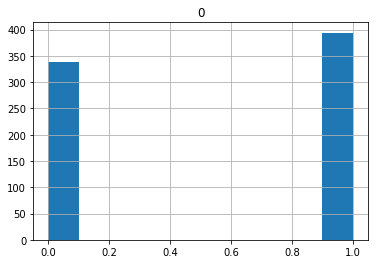

In [37]:
pd.DataFrame(y_t_bin).hist()
plt.show()

In [43]:
binarylabel_results = compare_classifiers(X_t, y_t_bin)
binarylabel_results

C:\Users\gulme\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\gulme\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\gulme\Anaconda3\lib\site-packages\sklearn\linea

{'AVERAGE': 0.78539893015937279,
 'DecisionTree': 0.73492106337102636,
 'ExtraTreesClassifier': 0.77595365023666529,
 'GaussianProcessClassifier': 0.77042709006134336,
 'GradientBoostingClassifier': 0.79797512202802701,
 'KNeighbors': 0.7990923492684745,
 'LinearSVC': 0.81012618935150815,
 'LogisticRegression': 0.81016359307067187,
 'Perceptron': 0.73875925051173053,
 'RandomForest': 0.76785574503774112,
 'RandomForestClassifier': 0.79923251681400009,
 'RidgeClassifierCV': 0.81147728623806636,
 'SVC': 0.80880330592321958}

In [44]:
def compare_dataset_results(y1, y2):
    return y1["AVERAGE"]/y2["AVERAGE"]

compare_dataset_results(multilabel_results, binarylabel_results)

0.7035330244017749

In [38]:
train_x_num.info()

# Let's try to eliminate CA and Thal column.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 732 entries, 25 to 102
Data columns (total 13 columns):
Age         732 non-null float64
Sex         732 non-null float64
CP          732 non-null float64
Trestbps    687 non-null float64
Chol        710 non-null float64
Fbs         662 non-null float64
Restecg     730 non-null float64
Thalach     689 non-null float64
Exang       689 non-null float64
Oldpeak     683 non-null float64
Slope       492 non-null float64
CA          249 non-null float64
Thal        341 non-null float64
dtypes: float64(13)
memory usage: 80.1 KB


In [39]:
train_x_eliminated = train_x.drop(["CA"], axis=1)

In [40]:
train_x_eliminated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 732 entries, 25 to 102
Data columns (total 12 columns):
Age         732 non-null float64
Sex         732 non-null float64
CP          732 non-null float64
Trestbps    687 non-null object
Chol        710 non-null object
Fbs         662 non-null object
Restecg     730 non-null object
Thalach     689 non-null object
Exang       689 non-null object
Oldpeak     683 non-null object
Slope       492 non-null object
Thal        341 non-null object
dtypes: float64(3), object(9)
memory usage: 74.3+ KB


In [41]:
pipeline_eliminated = prepare_pipeline(train_x_eliminated, ["CP", "Restecg", "Thal", "Slope"])

In [42]:
train_x_eliminated = pipeline_eliminated.transform(train_x_eliminated)

In [43]:
train_x_eliminated.shape

(732, 21)

In [51]:
compare_classifiers(train_x_eliminated, train_y)

C:\Users\gulme\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\gulme\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\gulme\Anaconda3\lib\site-packages\sklearn\linea

{'AVERAGE': 0.54919485284017311,
 'DecisionTree': 0.49201330112660158,
 'ExtraTreesClassifier': 0.53550665373325479,
 'GaussianProcessClassifier': 0.53957833273104205,
 'GradientBoostingClassifier': 0.55609328540363023,
 'KNeighbors': 0.56414433434137867,
 'LinearSVC': 0.56696844627879117,
 'LogisticRegression': 0.56837571561709488,
 'Perceptron': 0.49288706722204256,
 'RandomForest': 0.57117186856103108,
 'RandomForestClassifier': 0.54506837590581436,
 'RidgeClassifierCV': 0.56966157572068898,
 'SVC': 0.58886927744070605}

In [52]:
compare_classifiers(train_x_eliminated, y_t_bin)

C:\Users\gulme\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\gulme\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\gulme\Anaconda3\lib\site-packages\sklearn\linea

{'AVERAGE': 0.78085288941588293,
 'DecisionTree': 0.74319692543999183,
 'ExtraTreesClassifier': 0.76637354233143429,
 'GaussianProcessClassifier': 0.7717687396167725,
 'GradientBoostingClassifier': 0.7842947438777117,
 'KNeighbors': 0.78958743440692281,
 'LinearSVC': 0.80877509246495016,
 'LogisticRegression': 0.80467456514963109,
 'Perceptron': 0.70188451762377135,
 'RandomForest': 0.78965228037365165,
 'RandomForestClassifier': 0.79652087570975483,
 'RidgeClassifierCV': 0.80878441126096168,
 'SVC': 0.80472154473504087}

In [53]:
train_x_eliminated = train_x_num.drop(["CA", "Thal"], axis=1)
pipeline_eliminated = prepare_pipeline(train_x_eliminated, ["CP", "Restecg","Slope"])
train_x_eliminated = pipeline_eliminated.transform(train_x_eliminated)
compare_classifiers(train_x_eliminated, train_y), compare_classifiers(train_x_eliminated, y_t_bin)

C:\Users\gulme\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\gulme\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\gulme\Anaconda3\lib\site-packages\sklearn\linea

({'AVERAGE': 0.54352410115956895,
  'DecisionTree': 0.49877963114416318,
  'ExtraTreesClassifier': 0.53555337885387144,
  'GaussianProcessClassifier': 0.53827370650030748,
  'GradientBoostingClassifier': 0.55070664612536535,
  'KNeighbors': 0.55051055277656258,
  'LinearSVC': 0.56706189652002459,
  'LogisticRegression': 0.56704313039288412,
  'Perceptron': 0.47365140650854931,
  'RandomForest': 0.55331551819236546,
  'RandomForestClassifier': 0.5286196752699216,
  'RidgeClassifierCV': 0.5711810614273668,
  'SVC': 0.58759261020344766},
 {'AVERAGE': 0.7657000450944037,
  'DecisionTree': 0.71986124634076576,
  'ExtraTreesClassifier': 0.76498452758524293,
  'GaussianProcessClassifier': 0.77045491791426068,
  'GradientBoostingClassifier': 0.78285926368657988,
  'KNeighbors': 0.76774301973978065,
  'LinearSVC': 0.79515075562582138,
  'LogisticRegression': 0.79104090951449069,
  'Perceptron': 0.67729260055462903,
  'RandomForest': 0.77599079688559414,
  'RandomForestClassifier': 0.76781808424

In [54]:
train_x_eliminated = train_x_num.drop(["Sex", "Fbs", "CA"], axis=1)
pipeline_eliminated = prepare_pipeline(train_x_eliminated, ["CP", "Restecg", "Thal","Slope"])
train_x_eliminated = pipeline_eliminated.transform(train_x_eliminated)
compare_classifiers(train_x_eliminated, train_y), compare_classifiers(train_x_eliminated, y_t_bin)

C:\Users\gulme\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\gulme\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\gulme\Anaconda3\lib\site-packages\sklearn\linea

({'AVERAGE': 0.54439547922306553,
  'DecisionTree': 0.48381250356619815,
  'ExtraTreesClassifier': 0.54646531119437525,
  'GaussianProcessClassifier': 0.52730471498944398,
  'GradientBoostingClassifier': 0.55063234240574144,
  'KNeighbors': 0.52995226049413247,
  'LinearSVC': 0.56428450970322896,
  'LogisticRegression': 0.57113471670121929,
  'Perceptron': 0.47083762862087986,
  'RandomForest': 0.57646505759806244,
  'RandomForestClassifier': 0.5518806702550545,
  'RidgeClassifierCV': 0.5711439095675549,
  'SVC': 0.58883212558089404},
 {'AVERAGE': 0.76937678141639265,
  'DecisionTree': 0.71184875272735459,
  'ExtraTreesClassifier': 0.75548918858993763,
  'GaussianProcessClassifier': 0.75820095822930023,
  'GradientBoostingClassifier': 0.76926314030572063,
  'KNeighbors': 0.77188146491473297,
  'LinearSVC': 0.8060164717752949,
  'LogisticRegression': 0.80466537488873668,
  'Perceptron': 0.73195704356376479,
  'RandomForest': 0.76647669176314825,
  'RandomForestClassifier': 0.75280550387

In [55]:
train_x_eliminated = train_x_num.drop(["Sex", "CA"], axis=1)
pipeline_eliminated = prepare_pipeline(train_x_eliminated, ["CP", "Restecg", "Thal", "Slope"])
train_x_eliminated = pipeline_eliminated.transform(train_x_eliminated)
compare_classifiers(train_x_eliminated, train_y), compare_classifiers(train_x_eliminated, y_t_bin)

C:\Users\gulme\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\gulme\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\gulme\Anaconda3\lib\site-packages\sklearn\linea

({'AVERAGE': 0.54866303495613844,
  'DecisionTree': 0.50028916319556715,
  'ExtraTreesClassifier': 0.56421863806100259,
  'GaussianProcessClassifier': 0.543631625996158,
  'GradientBoostingClassifier': 0.55758481211683175,
  'KNeighbors': 0.5545646068306167,
  'LinearSVC': 0.56832899049647811,
  'LogisticRegression': 0.57256075216666347,
  'Perceptron': 0.46698924117643337,
  'RandomForest': 0.54658748121802314,
  'RandomForestClassifier': 0.54517139940785264,
  'RidgeClassifierCV': 0.5724669215309609,
  'SVC': 0.59156278727707301},
 {'AVERAGE': 0.77606762339639046,
  'DecisionTree': 0.72816570747335307,
  'ExtraTreesClassifier': 0.75818219210215976,
  'GaussianProcessClassifier': 0.76357751792261541,
  'GradientBoostingClassifier': 0.78701583231308581,
  'KNeighbors': 0.7855056732187442,
  'LinearSVC': 0.8060164717752949,
  'LogisticRegression': 0.79649266225148541,
  'Perceptron': 0.72110983647119686,
  'RandomForest': 0.77593475557440739,
  'RandomForestClassifier': 0.77734227937750

In [56]:
train_x_eliminated = train_x_num.drop(["Fbs", "CA"], axis=1)
pipeline_eliminated = prepare_pipeline(train_x_eliminated, ["CP", "Restecg", "Thal", "Slope"])
train_x_eliminated = pipeline_eliminated.transform(train_x_eliminated)
compare_classifiers(train_x_eliminated, train_y), compare_classifiers(train_x_eliminated, y_t_bin)

C:\Users\gulme\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\gulme\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\gulme\Anaconda3\lib\site-packages\sklearn\linea

({'AVERAGE': 0.54452280570507172,
  'DecisionTree': 0.49751215677324057,
  'ExtraTreesClassifier': 0.54237562685838547,
  'GaussianProcessClassifier': 0.5314709854118721,
  'GradientBoostingClassifier': 0.55203003848324039,
  'KNeighbors': 0.53817182418167642,
  'LinearSVC': 0.56832899049647811,
  'LogisticRegression': 0.56970830084130575,
  'Perceptron': 0.46677324051708285,
  'RandomForest': 0.56285847423778446,
  'RandomForestClassifier': 0.55740748489516956,
  'RidgeClassifierCV': 0.57106884505899269,
  'SVC': 0.57656770070563179},
 {'AVERAGE': 0.77277573728278925,
  'DecisionTree': 0.72547231835577886,
  'ExtraTreesClassifier': 0.74999071333776779,
  'GaussianProcessClassifier': 0.77321379567415049,
  'GradientBoostingClassifier': 0.78430406267372332,
  'KNeighbors': 0.77455583083493207,
  'LinearSVC': 0.81835507183506384,
  'LogisticRegression': 0.8156527495268302,
  'Perceptron': 0.68537109695082576,
  'RandomForest': 0.77327941285158375,
  'RandomForestClassifier': 0.7650781011

In [57]:
"""
It is logical to keep thal and eliminate CA column. 
CA is very insufficiant for training and only 250 out of 800 instances have it.
Thal also insufficiant actually but the feature numbers are low so if we drop that feature too, 
we will have an overfit situation.
So lets keep Thal and drop CA.
"""

'\nIt is logical to keep thal and eliminate CA column. \nCA is very insufficiant for training and only 250 out of 800 instances have it.\nThal also insufficiant actually but the feature numbers are low so if we drop that feature too, \nwe will have an overfit situation.\nSo lets keep Thal and drop CA.\n'

In [60]:
train_x_final = train_x.drop(["CA"], axis=1)
pipeline_data = prepare_pipeline(train_x_final, ["CP", "Restecg", "Thal", "Slope"])
train_x_final = pipeline_data.transform(train_x_final)
train_y_final = y_t_bin

In [59]:
"""
Lets remember our dataset result:
 'AVERAGE': 0.78085288941588293,
 'DecisionTree': 0.74319692543999183,
 'ExtraTreesClassifier': 0.76637354233143429,
 'GaussianProcessClassifier': 0.7717687396167725,
 'GradientBoostingClassifier': 0.7842947438777117,
 'KNeighbors': 0.78958743440692281,
 'LinearSVC': 0.80877509246495016,
 'LogisticRegression': 0.80467456514963109,
 'Perceptron': 0.70188451762377135,
 'RandomForest': 0.78965228037365165,
 'RandomForestClassifier': 0.79652087570975483,
 'RidgeClassifierCV': 0.80878441126096168,
 'SVC': 0.80472154473504087
 
Note that, the most successful classifiers so far are:
 * sklearn.svm.SVC
 * sklearn.linear_model.RidgeClassifier
 * sklearn.linear_model.LogisticRegression
 * sklearn.svm.LinearSVC
 * sklearn.ensemble.RandomForestClassifier
Those algorithms are above of 80% accuracy.

I will proceed over them. 
"""

"\nLets remember our dataset result:\n 'AVERAGE': 0.78085288941588293,\n 'DecisionTree': 0.74319692543999183,\n 'ExtraTreesClassifier': 0.76637354233143429,\n 'GaussianProcessClassifier': 0.7717687396167725,\n 'GradientBoostingClassifier': 0.7842947438777117,\n 'KNeighbors': 0.78958743440692281,\n 'LinearSVC': 0.80877509246495016,\n 'LogisticRegression': 0.80467456514963109,\n 'Perceptron': 0.70188451762377135,\n 'RandomForest': 0.78965228037365165,\n 'RandomForestClassifier': 0.79652087570975483,\n 'RidgeClassifierCV': 0.80878441126096168,\n 'SVC': 0.80472154473504087\n \nNote that, the most successful classifiers so far are:\n * sklearn.svm.SVC\n * sklearn.linear_model.RidgeClassifier\n * sklearn.linear_model.LogisticRegression\n * sklearn.svm.LinearSVC\nThose algorithms are above of 80% accuracy.\n\nI will proceed over them. \n"

In [ ]:
"""
I will fine tune that models to find best parameters of models.
"""

In [60]:
"""
sklearn.svm.SVC
"""

'\nsklearn.svm.SVC\n'

In [65]:
from sklearn.model_selection import GridSearchCV
Models = {}

In [62]:
"""
Those grid search processes normally takes long time. 
But my dataset and feature numbers are tiny so that will not be a problem
"""

np.random.seed(0)
param_grid = [
    {
        "kernel": ["rbf", "linear", "poly", "sigmoid"],
        "C": np.arange(0.5, 1.6, 0.1),
        "degree": np.arange(0,11, 5),
        "shrinking": [False, True],
    }
]

from sklearn.svm import SVC
svc = SVC()

SVCfine = GridSearchCV(svc, param_grid, cv=5, scoring="accuracy")
SVCfine.fit(train_x_final, train_y_final)
SVCfine.best_score_
Models["SVCFined"] = SVCfine.best_estimator_

0.80737704918032782

In [66]:
"""
sklearn.linear_model.RidgeClassifier
"""

'\nsklearn.linear_model.RidgeClassifier\n'

In [67]:
np.random.seed(0)
param_grid = [
    {
        "alpha": np.arange(10,0,-0.1),
        "fit_intercept": [True, False],
        "copy_X" : [True],
        "tol": np.arange(0.1, 2, 0.1),
        "solver": ["svd", "cholesky", "lsqr", "sparse_cg", "sag", "saga"]
        
    }
]

from sklearn.linear_model import RidgeClassifier
rc = RidgeClassifier()

RCfine = GridSearchCV(rc, param_grid, cv=5, scoring="accuracy")
RCfine.fit(train_x_final, train_y_final)
Models["RidgeFined"] = RCfine.best_estimator_
RCfine.best_score_

In [68]:
RCfine.best_params_

{'alpha': 4.5000000000000195,
 'copy_X': True,
 'fit_intercept': True,
 'solver': 'saga',
 'tol': 1.3000000000000003}

In [69]:
np.random.seed(0)
param_grid = [
    {
        "penalty": ["l1"],
        "C": np.arange(2,0,-0.1),
        "fit_intercept": [True, False],
        "tol": np.arange(0.1, 2, 0.1),
        "solver": ["liblinear", "saga"]        
    },
    {
        "penalty": ["l2"],
        "C": np.arange(2,0,-0.1),
        "fit_intercept": [True, False],
        "tol": np.arange(0.1, 2, 0.1),
        "solver": ["newton-cg", "lbfgs", "sag"]
    }
]

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

LRfine = GridSearchCV(lr, param_grid, cv=5, scoring="accuracy")
LRfine.fit(train_x_final, train_y_final)
Models["LogRegFined"] = LRfine.best_estimator_
LRfine.best_score_

0.81830601092896171

In [70]:
LRfine.best_params_

{'C': 0.69999999999999885,
 'fit_intercept': True,
 'penalty': 'l1',
 'solver': 'saga',
 'tol': 0.5}

In [71]:
np.random.seed(0)
param_grid = [
    {
        "n_estimators": np.arange(50,0,-5),
        "criterion": ["gini", "entropy"],
        "max_features": ["auto", "sqrt", "log2"],
        "max_depth": [1,2,3,4,5,6,7,8,9],
        "min_samples_split": np.arange(0.1, 1, 0.2),
    }
]

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

RFCfine = GridSearchCV(rfc, param_grid, cv=5, scoring="accuracy")
RFCfine.fit(train_x_final, train_y_final)
Models["RanForestFined"] = RFCfine.best_estimator_
RFCfine.best_score_

0.82103825136612019

In [72]:
RFCfine.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'log2',
 'min_samples_split': 0.10000000000000001,
 'n_estimators': 30}

In [73]:
RFCfine.best_estimator_.feature_importances_


array([ 0.00730925,  0.0604792 ,  0.01319483,  0.24725548,  0.00387021,
        0.0074402 ,  0.00247955,  0.00858526,  0.0022088 ,  0.        ,
        0.0491362 ,  0.01330313,  0.03764696,  0.07804941,  0.02792065,
        0.02509003,  0.07386802,  0.00033975,  0.09197545,  0.1482815 ,
        0.10156614])

In [74]:
np.random.seed(0)
param_grid = [
    {
        "penalty": ["l2"],
        "C": np.arange(3,0,-0.1),
        "fit_intercept": [True, False],
        "loss": ["hinge", "squared_hinge"],
        "tol": np.arange(0.1, 2, 0.1),
    }
]

from sklearn.svm import LinearSVC
lsvc = LinearSVC()

LSVCfine = GridSearchCV(lsvc, param_grid, cv=5, scoring="accuracy")
LSVCfine.fit(train_x_final, train_y_final)
Models["LinearSVCFined"] = LSVCfine.best_estimator_
LSVCfine.best_score_

0.82240437158469948

In [75]:
"""
In last step of model tuning, I will try to ensemble my best models. 
It may create a better model.
"""

'\nIn last step of model tuning, I will try to ensemble my best models. \nIt may create a better model.\n'

In [78]:
from sklearn.ensemble import VotingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score as tuning
from sklearn.model_selection import GridSearchCV

np.random.seed(0)
voteSoft = VotingClassifier(
        estimators=[("svc", SVCfine.best_estimator_.set_params(probability=True)),("lr", LRfine.best_estimator_)],
        voting = "soft")


voteHard = VotingClassifier(
    estimators = [("lsvc", LSVCfine.best_estimator_), ("rc", RCfine.best_estimator_)],
    voting = "hard"
)


voteBest3 = VotingClassifier(estimators=[
    ("lr", LRfine.best_estimator_),
    ("lsvc", LSVCfine.best_estimator_), 
    ("rc", RCfine.best_estimator_)],
    voting="hard"
)


In [79]:
tuning(voteSoft, train_x_final, train_y_final, scoring="accuracy", cv = 5).mean()

0.80884070964238308

In [80]:
tuning(voteHard, train_x_final, train_y_final, scoring="accuracy", cv = 5).mean()

0.79238281614015471

In [81]:
tuning(voteBest3, train_x_final, train_y_final, scoring="accuracy", cv = 5).mean()

0.80603510936731804

In [102]:
voteBest3.fit(train_x_final, train_y_final)
voteHard.fit(train_x_final, train_y_final)
voteSoft.fit(train_x_final, train_y_final)

Models["Soft Voting"]= voteSoft
Models["Hard Voting"]= voteHard
Models["voteBest3"] = voteBest3

In [82]:
boostBest = AdaBoostClassifier(voteBest3, algorithm="SAMME")
tuning(boostBest, train_x_final, train_y_final, scoring="accuracy", cv=5).mean()

0.80599744857791955

In [104]:
boostBest.fit(train_x_final, train_y_final)
Models["AdaBoost"] = boostBest

In [83]:
from sklearn.model_selection import train_test_split

allData = np.column_stack((train_x_final, train_y_final.T))
train_stack, test_stack = train_test_split(allData, test_size = 0.2, random_state=0)
train_stack.shape, test_stack.shape

((585, 22), (147, 22))

In [84]:
"""
Lets split the trainind set into training and validation sets.
By the way, I will create a stacking model with Random Forests.
"""
train_stack_y = train_stack[:,21]
train_stack_x = train_stack[:,:21]

test_stack_y = test_stack[:,21]
test_stack_x = test_stack[:,:21]

In [85]:
LRfine.best_estimator_.fit(train_stack_x[:450,:], train_stack_y[:450])
LSVCfine.best_estimator_.fit(train_stack_x[:450,:], train_stack_y[:450])
RCfine.best_estimator_.fit(train_stack_x[:450,:], train_stack_y[:450])

stackLR = LRfine.best_estimator_.predict(train_stack_x[450:,:])
stackLSVC = LSVCfine.best_estimator_.predict(train_stack_x[450:,:])
stackRC = RCfine.best_estimator_.predict(train_stack_x[450:,:])

In [86]:
stack = np.column_stack((stackLR, stackLSVC, stackRC))

In [87]:
stack.shape

(135, 3)

In [88]:
from sklearn.ensemble import RandomForestClassifier

stackClf = RandomForestClassifier()
stackClf.fit(stack, train_stack_y[450:])

In [89]:
stackPredict = stackClf.predict(
    np.column_stack(
        (
        LRfine.best_estimator_.predict(test_stack_x),
        LSVCfine.best_estimator_.predict(test_stack_x),
        RCfine.best_estimator_.predict(test_stack_x)
        )
    )
)
accuracy_score(test_stack_y, stackPredict)

0.8231292517006803

In [91]:
test_x.head()

,Age,Sex,CP,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,CA,Thal
78,60.0,1.0,4.0,130,0,NaN,1,130,1,1.1,3,1,NaN
162,69.0,1.0,4.0,NaN,289,1,1,NaN,NaN,NaN,NaN,NaN,NaN
53,55.0,1.0,4.0,140,0,0,0,83,0,0,2,NaN,7
55,56.0,1.0,3.0,125,0,NaN,0,98,0,-2,2,NaN,7
60,56.0,1.0,4.0,125,0,1,0,103,1,1,2,NaN,7


In [92]:
test_x_fin = test_x.drop(["CA"], axis=1)
test_x_fin = prepare_pipeline(test_x_fin, ["CP", "Restecg", "Thal", "Slope"]).transform(test_x_fin)
test_x_fin

array([[-0.18359702, -0.51861886, -0.45883147, ..., -0.24497051,
         1.40276225,  0.27564   ],
       [-0.18359702, -0.51861886, -0.45883147, ...,  0.14664177,
        -0.71287918, -0.36635696],
       [-0.18359702, -0.51861886, -0.45883147, ..., -2.08554823,
        -0.71287918, -0.73321237],
       ..., 
       [-0.18359702, -0.51861886, -0.45883147, ..., -0.63658279,
         1.40276225,  2.01820319],
       [-0.18359702, -0.51861886, -0.45883147, ..., -0.44077665,
         1.40276225,  1.55963393],
       [-0.18359702, -0.51861886,  2.17944947, ...,  0.14664177,
        -0.71287918, -0.36635696]])

In [93]:
test_y_fin = binary_label(test_y)
test_y_fin

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1], dtype=int64)

In [97]:
from sklearn.metrics import accuracy_score
def calculate_test_accuracy(models, X, y):
    predictions = {}
    scores = {}
    
    for model in models:
        predictions[model] = models[model].predict(X)
        
    for model in predictions:
        scores[model] = accuracy_score(predictions[model],y)
    return scores

In [110]:
calculate_test_accuracy(Models, test_x_fin, test_y_fin)

{'AdaBoost': 0.83152173913043481,
 'Hard Voting': 0.83152173913043481,
 'LinearSVCFined': 0.83695652173913049,
 'LogRegFined': 0.84239130434782605,
 'RanForestFined': 0.85869565217391308,
 'RidgeFined': 0.79891304347826086,
 'SVCFined': 0.85326086956521741,
 'Soft Voting': 0.84782608695652173,
 'voteBest3': 0.85326086956521741}

In [111]:
"""
The final models are very good.
Except the RidgeFined model, that model seems to overfit.

That can be seen the ensemble methods perform well than individual models.

In next chapter, I will try another approach, I will try to predict multiclass prediction, by stacking. 
First I will predict probas via first level Random Forest then I will use that probas as training set of second layer 
Random Forest.
"""

'\nThe final models are very good.\nExcept the RidgeFined model, that model seems to be overfit.\n\nThat can be seen the ensemble methods perform well than individual models.\n'

In [114]:
from sklearn.ensemble import RandomForestClassifier
probasModel = RandomForestClassifier(random_state=0)

In [155]:
# create a new test, train, validation set.
from sklearn.model_selection import train_test_split
probaData = np.column_stack((train_x_final, train_y)) 
probaTrain, probaTest = train_test_split(probaData)

probaTrain, probaValidation = train_test_split(probaTrain)
probaTrain_y = probaTrain[:,21]
probaTrain_X = probaTrain[:,:21]

probaValidation_y = probaValidation[:,21]
probaValidation_X = probaValidation[:,:21]

probaTest_y = probaTest[:,21]
probaTest_X = probaTest[:,:21]

((411, 22), (183, 22))

In [156]:
probasModel.fit(probaTrain_X, probaTrain_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [159]:
probas = probasModel.predict_proba(probaValidation_X)
probas

array([[ 0.3,  0.1,  0.4,  0.1,  0.1],
       [ 0.8,  0.2,  0. ,  0. ,  0. ],
       [ 0.4,  0.6,  0. ,  0. ,  0. ],
       [ 0.2,  0.8,  0. ,  0. ,  0. ],
       [ 0.2,  0.6,  0.1,  0.1,  0. ],
       [ 0.1,  0.7,  0.2,  0. ,  0. ],
       [ 1. ,  0. ,  0. ,  0. ,  0. ],
       [ 0.7,  0.3,  0. ,  0. ,  0. ],
       [ 0.6,  0.4,  0. ,  0. ,  0. ],
       [ 0.2,  0.6,  0.2,  0. ,  0. ],
       [ 0.8,  0.2,  0. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ,  0. ,  0. ],
       [ 0.5,  0.4,  0. ,  0.1,  0. ],
       [ 0.1,  0.3,  0.4,  0.1,  0.1],
       [ 1. ,  0. ,  0. ,  0. ,  0. ],
       [ 0.9,  0.1,  0. ,  0. ,  0. ],
       [ 0.7,  0.2,  0. ,  0.1,  0. ],
       [ 0.1,  0.5,  0.4,  0. ,  0. ],
       [ 0.3,  0.4,  0.1,  0.2,  0. ],
       [ 0.2,  0.3,  0.1,  0.3,  0.1],
       [ 1. ,  0. ,  0. ,  0. ,  0. ],
       [ 0.9,  0.1,  0. ,  0. ,  0. ],
       [ 0.8,  0.1,  0.1,  0. ,  0. ],
       [ 0.1,  0.5,  0.1,  0.3,  0. ],
       [ 0.7,  0.1,  0.2,

In [160]:
probas.shape

(138, 5)

In [161]:
from sklearn.ensemble import RandomForestClassifier
probaStack = RandomForestClassifier(random_state = 0)
probaStack.fit(probas, probaValidation_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [163]:
from sklearn.metrics import accuracy_score

probaPredictedClass = probaStack.predict(probasModel.predict_proba(probaTest_X))
accuracy_score(probaPredictedClass, probaTest_y)

0.46448087431693991

In [ ]:
"""
The accuracy is very low, especially in comparison of one-layered algorithms that I tried.
The main reason is my data set has very few instances, If I use them by dividing into stacks, 
That few dataset becomes fewer, that lowers the accuracy.
So, binary classification is much more appropriate in this data and I reached %85 accuracy with some algorithms.
"""